# FACE RECOGNITION with 10 Algorithms

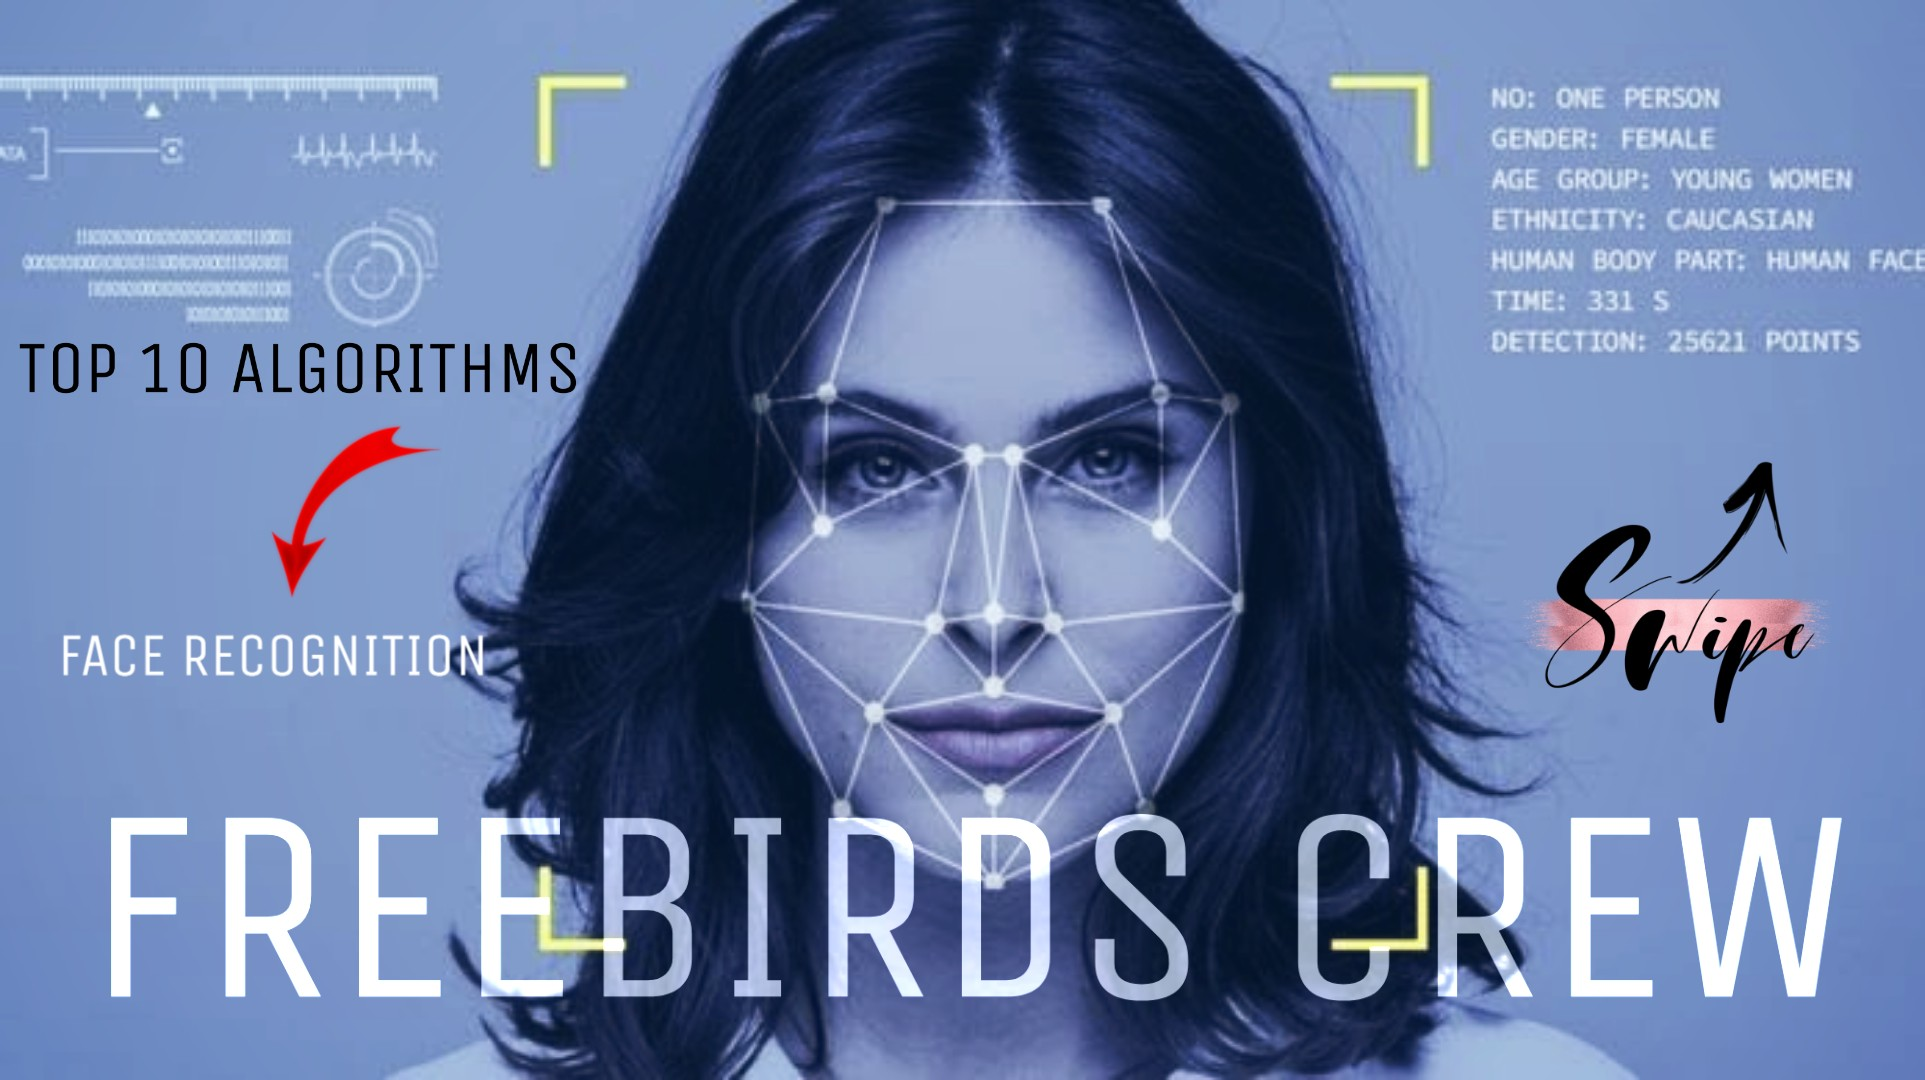

In [2]:
from IPython.display import Image
Image(filename='FreeBirds_Crew_FR.jpg')

### FACE RECOGNITION using OpenCV2 and Ada Boost Learning Algorithm

In [1]:
# Create_Database
import cv2, sys, numpy, os, time
count = 0
size = 4
fn_haar = 'haarcascade_frontalface_default.xml'
fn_dir = 'database'
fn_name = input("Enter the Person's Name: ")
path = os.path.join(fn_dir, fn_name)
if not os.path.isdir(path):
    os.mkdir(path)
(im_width, im_height) = (112, 92)
haar_cascade = cv2.CascadeClassifier(fn_haar)
webcam = cv2.VideoCapture(0)

print("-----------------------Taking pictures----------------------")
print("--------------------Give some expressions---------------------")

while count < 45:
    (rval, im) = webcam.read()
    im = cv2.flip(im, 1, 0)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    mini = cv2.resize(gray,(gray.shape[1]//size, gray.shape[0]//size))
    faces = haar_cascade.detectMultiScale(mini)
    faces = sorted(faces, key=lambda x: x[3])
    if faces:
        face_i = faces[0]
        (x, y, w, h) = [v * size for v in face_i]
        face = gray[y:y + h, x:x + w]
        face_resize = cv2.resize(face, (im_width, im_height))
        pin=sorted([int(n[:n.find('.')]) for n in os.listdir(path)
               if n[0]!='.' ]+[0])[-1] + 1
        cv2.imwrite('%s/%s.png' % (path, pin), face_resize)
        cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.putText(im, fn_name, (x - 10, y - 10), cv2.FONT_HERSHEY_PLAIN,
            1,(0, 255, 0))
        time.sleep(0.38)
        count += 1
    cv2.imshow('OpenCV', im)
    key = cv2.waitKey(10)
    if key == 27:
        break
print(str(count) + " images taken and saved to " + fn_name +" folder in database ")

Enter the Person's Name: Simran
-----------------------Taking pictures----------------------
--------------------Give some expressions---------------------
45 images taken and saved to Simran folder in database 


Algorithms that We can use -
1. Eigenfaces ( createEigenFaceRecognizer())
2. Fisherfaces ( createFisherFaceRecognizer())
3. Local Binary Patterns Histograms ( createLBPHFaceRecognizer())


-> We are going to use createLBPHFaceRecognizer(),

In [1]:
import cv2, sys, numpy, os

size = 4
haar_file = 'haarcascade_frontalface_default.xml'
datasets = 'database'

print('Training...')
# Create a list of images and a list of corresponding names
(images, lables, names, id) = ([], [], {}, 0)
for (subdirs, dirs, files) in os.walk(datasets):
    for subdir in dirs:
        names[id] = subdir
        subjectpath = os.path.join(datasets, subdir)
        for filename in os.listdir(subjectpath):
            path = subjectpath + '/' + filename
            lable = id
            images.append(cv2.imread(path, 0))
            lables.append(int(lable))
        id += 1
(width, height) = (130, 100)

# Create a Numpy array from the two lists above
(images, lables) = [numpy.array(lis) for lis in [images, lables]]

# OpenCV trains a model from the images
# NOTE FOR OpenCV2: remove '.face'
model = cv2.face.LBPHFaceRecognizer_create()
model.train(images, lables)

face_cascade = cv2.CascadeClassifier(haar_file)
webcam = cv2.VideoCapture(0)
while True:
    (_, im) = webcam.read()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 0), 2)
        face = gray[y:y + h, x:x + w]
        face_resize = cv2.resize(face, (width, height))
        # Try to recognize the face
        prediction = model.predict(face_resize)
        cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 3)

        if prediction[1] < 500:
            cv2.putText(im, '%s - %.0f' % (names[prediction[0]], prediction[1]), (x - 10, y - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0))
        else:
            cv2.putText(im, 'not recognized', (x - 10, y - 10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0))

    cv2.imshow('OpenCV', im)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        
webcam.release()
cv2.destroyAllWindows()

Training...


# Maximum accuracy 75%